<a href="https://colab.research.google.com/github/Digvijayapatro/Classification_machine_learning/blob/main/classification_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv

# Importing SKLearn clssifiers and libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [3]:
df_train = pd.read_csv('/content/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.shape


(891, 12)

In [5]:
df_train.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df_train = df_train.drop('Name', axis=1,)
df_train = df_train.drop('Ticket', axis=1,)
df_train = df_train.drop('Fare', axis=1,)
df_train = df_train.drop('Cabin', axis=1,)
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Embarked        object
dtype: object

In [7]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train = df_train.drop('SibSp', axis=1,)
df_train = df_train.drop('Parch', axis=1,)

In [8]:
df_train["Age"].describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
feat_list = list(df_train.columns.values)

for feat in feat_list:
    print (feat,": ",sum(pd.isnull(df_train[feat])))

PassengerId :  0
Survived :  0
Pclass :  0
Sex :  0
Age :  177
Embarked :  2
Family :  0


In [10]:
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].median())
df_train["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [11]:
df_train["Embarked"] = df_train["Embarked"].fillna("S")
# re-checking NaNs

feat_list = list(df_train.columns.values)

for feat in feat_list:
    print (feat,": ",sum(pd.isnull(df_train[feat])))

PassengerId :  0
Survived :  0
Pclass :  0
Sex :  0
Age :  0
Embarked :  0
Family :  0


In [12]:
# Checking statistics of Age column
df_train["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
df_train["Adult"] = 0
df_train["Adult"][df_train["Age"] >= 18] = 1

<ipython-input-13-78cedf8a5357>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Adult"][df_train["Age"] >= 18] = 1


In [14]:
# performing a sanitory check to confirm

### Number of passengers with age >= 18 - Age column
print ("Passengers more than 18 yrs old: ",str(len(df_train[df_train["Age"] >= 18])))

### Number of adult passengers  - Adult column

print ("Number of Adults: ",str(len(df_train[df_train["Adult"] >= 1])))

Passengers more than 18 yrs old:  778
Number of Adults:  778


In [15]:
# Dropping the Age column

df_train = df_train.drop('Age', axis=1,)

In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Family,Adult
0,1,0,3,male,S,2,1
1,2,1,1,female,C,2,1
2,3,1,3,female,S,1,1
3,4,1,1,female,S,2,1
4,5,0,3,male,S,1,1


In [17]:
def make_pivot (param1, param2):
    df_slice = df_train[[param1, param2, 'PassengerId']]
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2],aggfunc=np.size, fill_value=0)
    
    p_chart = slice_pivot.plot.bar()
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
    
    return slice_pivot
    return p_chart

PassengerId         
Pclass             1   2    3
Survived                     
0                 80  97  372
1                136  87  119

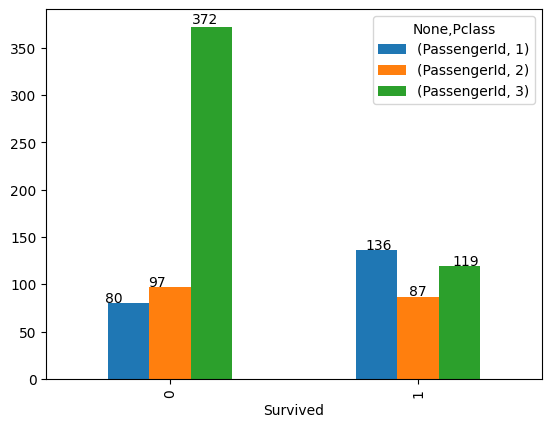

In [18]:
make_pivot("Survived","Pclass")


PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109

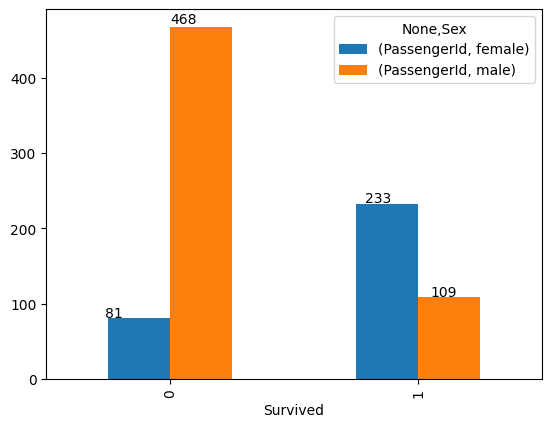

In [19]:
make_pivot("Survived","Sex")


PassengerId                             
Family            1   2   3   4   5   6  7  8  11
Survived                                         
0                374  72  43   8  12  19  8  6  7
1                163  89  59  21   3   3  4  0  0

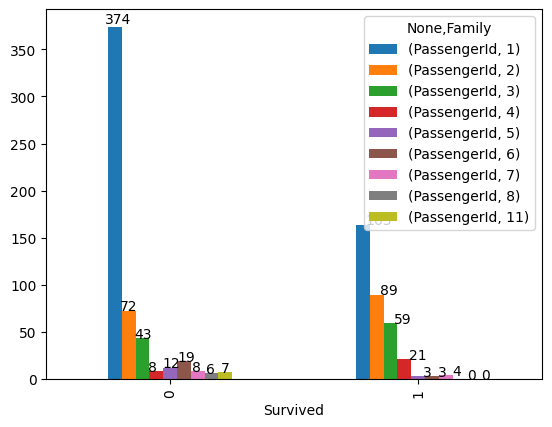

In [20]:
make_pivot("Survived","Family")


In [21]:
df1 = df_train.filter(['Pclass','Sex','Embarked','Family','Adult'], axis=1)

X = df1
df2 = df_train['Survived']

y = df2

In [22]:
X["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [23]:
X["Embarked"][df_train["Embarked"] == "S"] = 1
X["Embarked"][df_train["Embarked"] == "C"] = 2
X["Embarked"][df_train["Embarked"] == "Q"] = 3

<ipython-input-23-c2939fff091e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"][df_train["Embarked"] == "S"] = 1
<ipython-input-23-c2939fff091e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"][df_train["Embarked"] == "C"] = 2
<ipython-input-23-c2939fff091e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"][df_train["Embarked"] == "Q"] = 3


In [24]:
X["Sex"][df_train["Sex"] == "male"] = 1
X["Sex"][df_train["Sex"] == "female"] = 2

<ipython-input-24-7b5a1b0d2fdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"][df_train["Sex"] == "male"] = 1
<ipython-input-24-7b5a1b0d2fdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"][df_train["Sex"] == "female"] = 2
<ipython-input-25-7b5a1b0d2fdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"][df_train["Sex"] == "male"] = 1
<ipython-input-25-7b5a1b0d2fdc>:2: SettingWithCopyWarning: 
A value is try

In [26]:
test = SelectKBest(f_classif, k='all')
test_fit = test.fit(X, y)
feat_score = test_fit.scores_.round(3)
p_values = -np.log10(test_fit.pvalues_).round(3)
feature_list = list(X.columns.values)
selected_features = test.get_support([test_fit])
selected_features

array([0, 1, 2, 3, 4])

In [27]:
temp_list = [ ]

for i in selected_features:
    temp_list.append({'Feature':feature_list[i], 'P_Value':p_values[i], 'Score': feat_score[i]  })
    
feat_select = pd.DataFrame(temp_list)
feat_select = feat_select.sort_values(by='Score', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
feat_select = feat_select.set_index('Feature')
feat_select

,P_Value,Score
Feature,,
Sex,68.852,372.406
Pclass,24.596,115.031
Adult,3.594,13.485
Embarked,2.851,10.259
Family,0.208,0.246


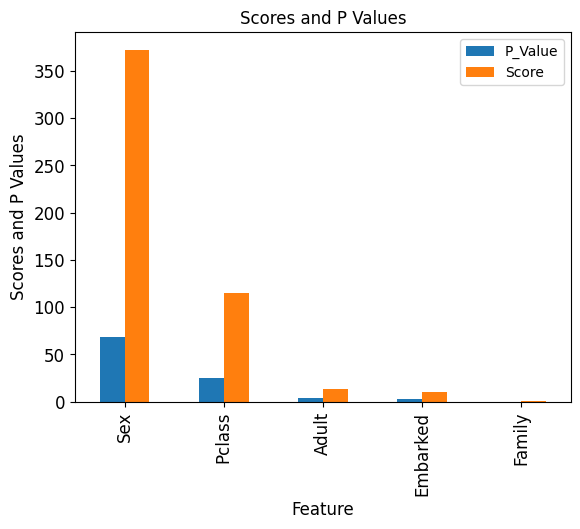

In [28]:
ax = feat_select[['P_Value','Score']].plot(kind='bar', title ="Scores and P Values",  legend=True, fontsize=12)
ax.set_xlabel("Feature", fontsize=12)
ax.set_ylabel("Scores and P Values", fontsize=12)
plt.show()

In [29]:
X = X.drop('Embarked', axis=1,)
X = X.drop('Family', axis=1,)
X.head()

,Pclass,Sex,Adult
0,3,1,1
1,1,2,1
2,3,2,1
3,1,2,1
4,3,1,1


In [30]:
features_train, features_test, labels_train, labels_test = \
    train_test_split(X, y, test_size=0.3, random_state=42)
features_train.shape

(623, 3)

In [31]:
features_test.shape


(268, 3)

In [32]:
labels_train.shape


(623,)

In [33]:
labels_test.shape


(268,)

In [34]:
knn = KNeighborsClassifier( )
k_range = list(range(1,10))
weights_options = ['uniform','distance']
k_grid = dict(n_neighbors=k_range, weights = weights_options)
grid = GridSearchCV(knn, k_grid, cv=10, scoring = 'precision')
grid.fit(features_train, labels_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='precision')

In [36]:
print ("Best Score: ",str(grid.best_score_))


Best Score:  0.8998137973137974


In [37]:
label_pred = grid.predict(features_test)
# Calculating Accuracy

acc_clf = metrics.accuracy_score(labels_test,label_pred)
print ("classifier's accuracy: ",str(acc_clf) )

classifier's accuracy:  0.7910447761194029


In [38]:
scr_clf = precision_recall_fscore_support(labels_test,label_pred, average='weighted')

print ("classifier's precision: ",str(scr_clf[0])) 
print ("classifier's recall: ",str(scr_clf[1])) 
print ("classifier's fbeta_score: ",str(scr_clf[2]))

classifier's precision:  0.8077389658661381
classifier's recall:  0.7910447761194029
classifier's fbeta_score:  0.7807467111084891


In [39]:
df_test = pd.read_csv('/content/test.csv')
df_test.dtypes


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [40]:
test_set = df_test[['Pclass', 'Sex', 'Age']].copy()
test_set.columns.values

array(['Pclass', 'Sex', 'Age'], dtype=object)

In [41]:
# checking NaNs

test_list = list(test_set.columns.values)

for test_item in test_list:
    print (test_item,": ",sum(pd.isnull(test_set[test_item])))

Pclass :  0
Sex :  0
Age :  86


In [42]:
# Filling NaN values in Age

test_set["Age"] = test_set["Age"].fillna(test_set["Age"].median())

In [43]:
# Creating the "Adult" column

test_set["Adult"] = 0
test_set["Adult"][test_set["Age"] >= 18] = 1


<ipython-input-43-40e150eb7978>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Adult"][test_set["Age"] >= 18] = 1


In [44]:
# Dropping the Age column

test_set = test_set.drop('Age', axis=1,)

In [45]:
test_set["Sex"][test_set["Sex"] == "male"] = 1
test_set["Sex"][test_set["Sex"] == "female"] = 2

<ipython-input-45-4688808b0b2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Sex"][test_set["Sex"] == "male"] = 1
<ipython-input-45-4688808b0b2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Sex"][test_set["Sex"] == "female"] = 2


In [46]:
test_set.head()


,Pclass,Sex,Adult
0,3,1,1
1,3,2,1
2,2,1,1
3,3,1,1
4,3,2,1


In [47]:
# predicting survivals on test set

final_pred = grid.predict(test_set)
final_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [48]:
len(final_pred)


418

In [49]:
df_test['Survived'] = pd.Series(final_pred, index=df_test.index)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [50]:
final_df = df_test.filter(['PassengerId','Survived'], axis=1)
final_df.shape

(418, 2)